In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import stats
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans, BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
wine = load_wine()

x = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x) # ARRAY

print("x_scaled shape:", x_scaled.shape) # ARRAY
print("y shape:", y.shape)
x

x_scaled shape: (178, 13)
y shape: (178,)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


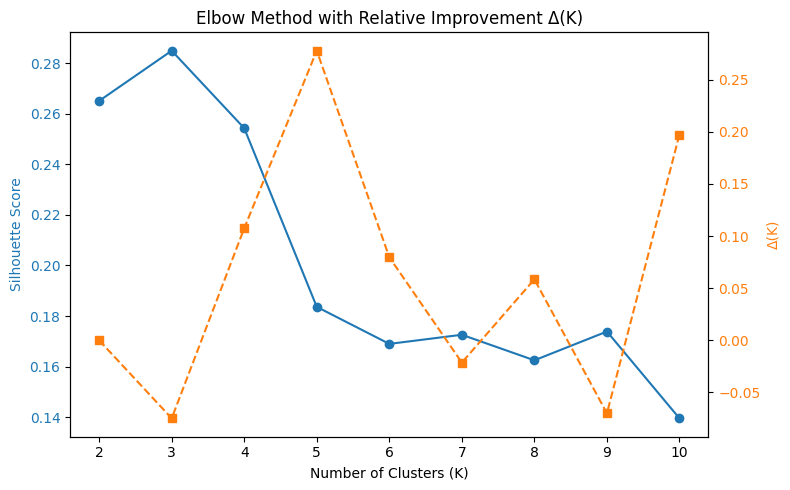

,K,WCSS,Silhouette Score,Calinski-Harabasz Score,Delta(K),Runtime (in ms)
0,2,1661.676117,0.265033,69.092287,0.000000,0.107001
1,3,1277.928489,0.284859,70.940008,-0.074806,0.007871
2,4,1211.753113,0.254228,52.758535,0.107532,0.003617
3,5,1123.156547,0.183621,45.856456,0.277730,0.004208
4,6,1079.538509,0.168992,39.336693,0.079670,0.008790
5,7,1014.430909,0.172602,36.510835,-0.021360,0.005542
6,8,982.654976,0.162504,32.903375,0.058501,0.005427
7,9,927.956076,0.173874,31.553409,-0.069966,0.006658
8,10,879.425701,0.139567,30.450236,0.197308,0.007911


In [ ]:
K = range(2, 11)
wcss = [] # HOW CLOSE DATA POINTS ARE TO CENTER OF their cluster, BE SMALL
silhouettes = []
calinski_harabasz = []
runtimeList = []

# WCSS AND DELTA GOAL - MEASURE BEST NUMBER OF CLUSTERS

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)

    runtime = 0.0
    start_time = time.perf_counter()
    # Training Only
    kmeans.fit(x_scaled)
    end_time = time.perf_counter()
    runtime = end_time - start_time

    # Training MOdel and Predicting Clusters
    labels = kmeans.fit_predict(x_scaled)
    silhouette_avg = silhouette_score(x_scaled, labels)
    silhouettes.append(silhouette_avg)
    # CALINSKI HARABASZ INDEX IMPLEMENTATION
    calinski_h = calinski_harabasz_score(x_scaled, labels)
    calinski_harabasz.append(calinski_h)
    wcss.append(kmeans.inertia_) # Inertia score
    # How tightly packed data points are around center of cluster
    # Finding distance of each data point to cluster centroid


    runtimeList.append(runtime)

delta = [0] # RELATIVE IMPROVEMENT OF SILHOUETTE SCORE AS K CLUSTERS INCREASES
for k in range(1, len(silhouettes)):
    delta_k = (silhouettes[k-1] - silhouettes[k]) / silhouettes[k-1]
    delta.append(delta_k)

fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('Silhouette Score', color=color)
ax1.plot(K, silhouettes, 'o-', color=color, label='Silhouette Score')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Δ(K)', color=color)
ax2.plot(K, delta, 's--', color=color, label='Δ(K)')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method with Relative Improvement Δ(K)')
fig.tight_layout()
plt.show()

results_kmeans_original = pd.DataFrame({
    'K': list(K),
    'WCSS': wcss,
    'Silhouette Score': silhouettes,
    'Calinski-Harabasz Score':calinski_harabasz,
    'Delta(K)': delta,
    'Runtime (in ms)': runtimeList
})

results_kmeans_original

Epsilon value: 0.5, minimum samples per cluster: 2
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


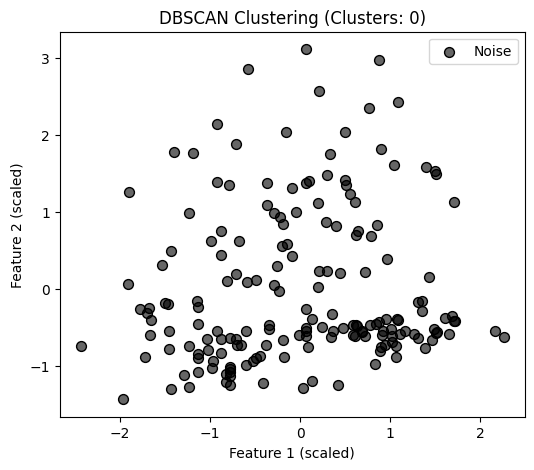

Epsilon value: 0.5, minimum samples per cluster: 3
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


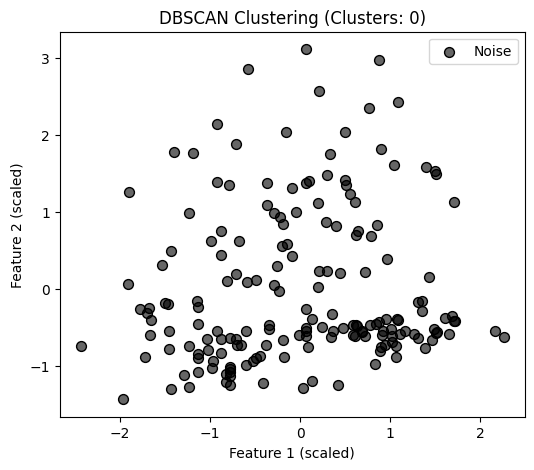

Epsilon value: 0.5, minimum samples per cluster: 5
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


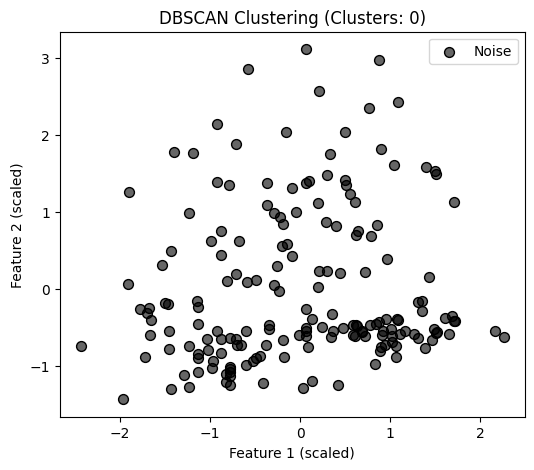

Epsilon value: 0.5, minimum samples per cluster: 26
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


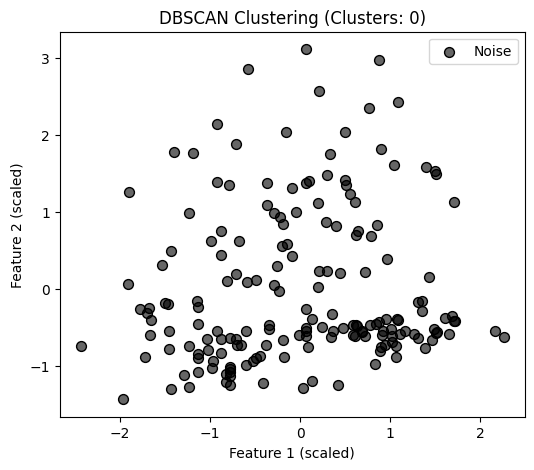

Epsilon value: 1.0, minimum samples per cluster: 2
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


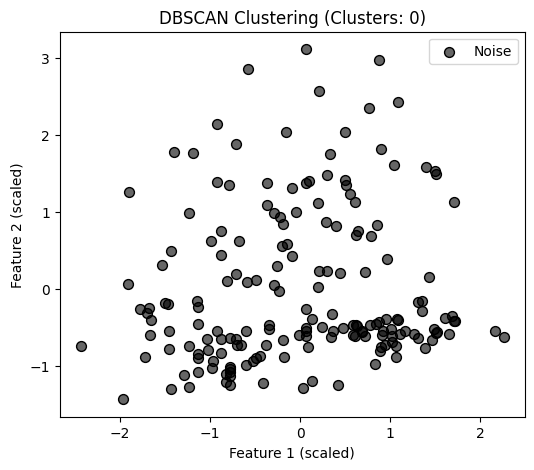

Epsilon value: 1.0, minimum samples per cluster: 3
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


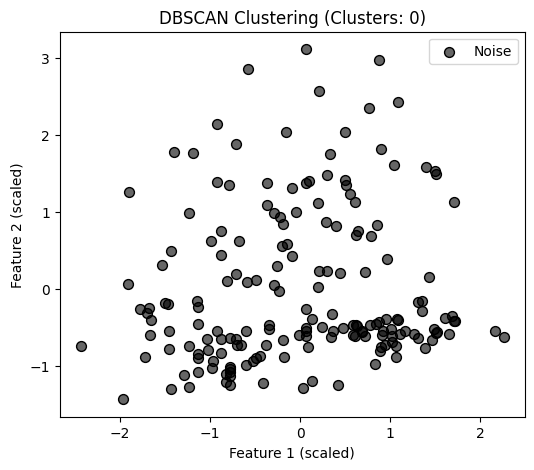

Epsilon value: 1.0, minimum samples per cluster: 5
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


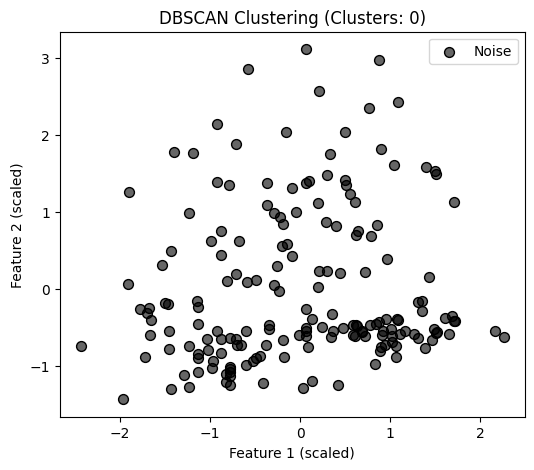

Epsilon value: 1.0, minimum samples per cluster: 26
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


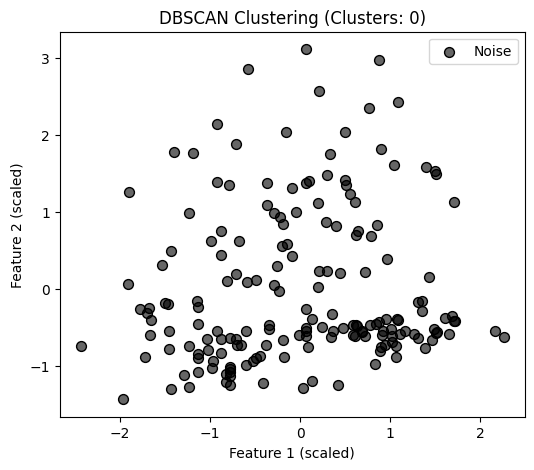

Epsilon value: 1.5, minimum samples per cluster: 2
Estimated number of clusters: 18
Silhouette score: -0.2593113145392012


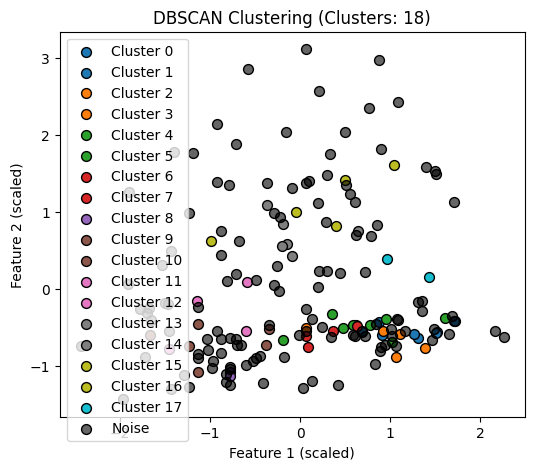

Epsilon value: 1.5, minimum samples per cluster: 3
Estimated number of clusters: 8
Silhouette score: -0.27676901365193624


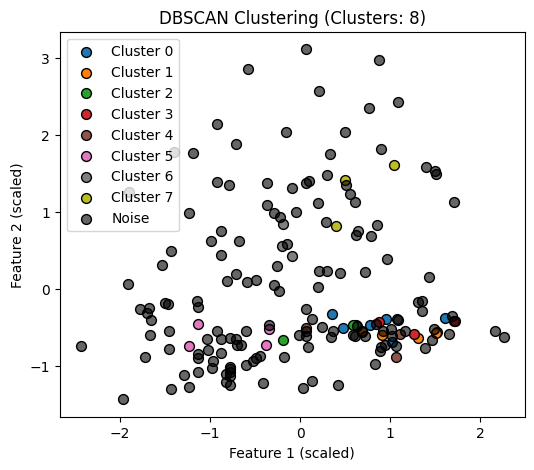

Epsilon value: 1.5, minimum samples per cluster: 5
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


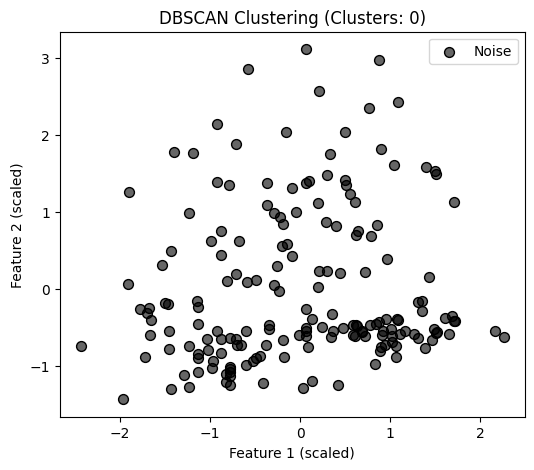

Epsilon value: 1.5, minimum samples per cluster: 26
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


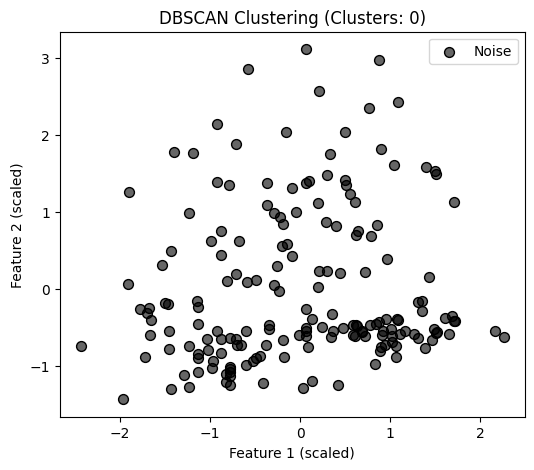

Epsilon value: 0.25, minimum samples per cluster: 2
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


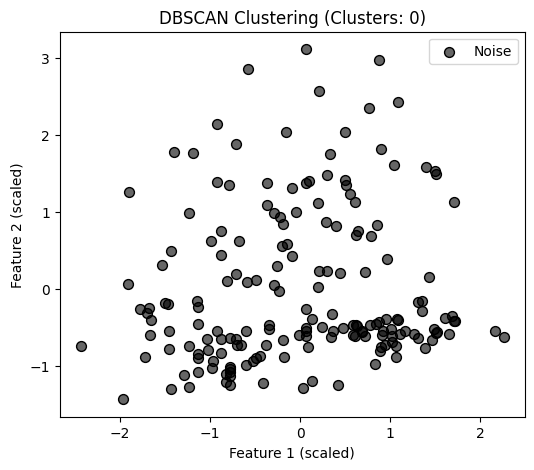

Epsilon value: 0.25, minimum samples per cluster: 3
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


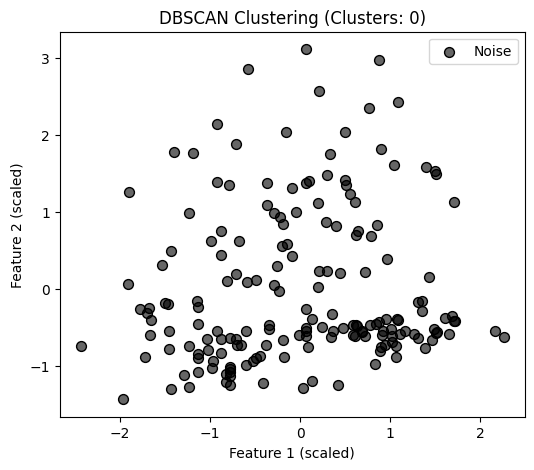

Epsilon value: 0.25, minimum samples per cluster: 5
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


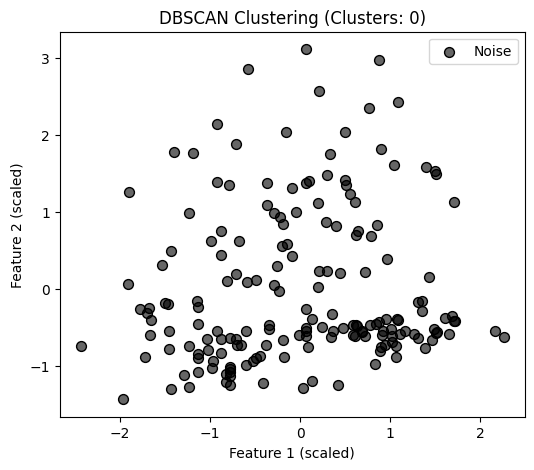

Epsilon value: 0.25, minimum samples per cluster: 26
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.


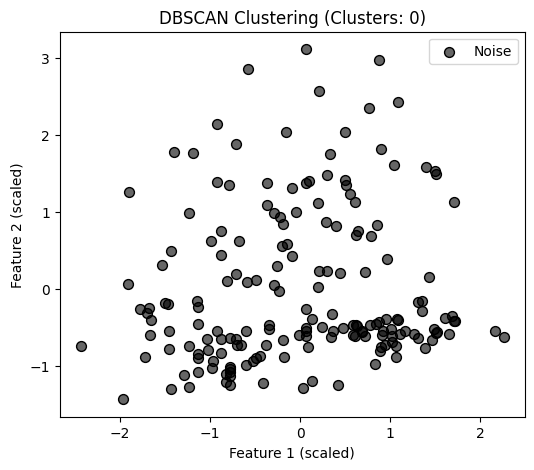

In [ ]:
# [DONE] TODO: Visualize DBSCAN results
# [DONE] TODO: Compute and compare Silhouette Scores between KMeans and DBSCAN


"""
a. Apply DBSCAN with varying eps and min_samples
- Applying an eps value of 0.6 is too small. No clusters provided.
b. Measure the silhouette score if number of clusters > 1
c. Identify any outliers and visualize their locations
d. Compare your results with KMeans
"""

# Hyperparameters
epsilon = [0.5, 1.0, 1.5, 0.25] # Where 0.25 is the elbow point found in KMeans
min_sample_values = [2, 3, 5, 26] # Where 26 is 2*current number of features in the dataset
for eps in epsilon:
    for m in min_sample_values:
        dbscan = DBSCAN(eps=eps, min_samples=m)
        print(F"Epsilon value: {eps}, minimum samples per cluster: {m}")
        # Finding Clusters by Fit and Labeling Points by Cluster by Predict
        dbscan_labels = dbscan.fit_predict(x_scaled)

        # Determining Number of Clusters
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        print(F"Estimated number of clusters: {n_clusters}")

        # Computing Silhouette Score
        if n_clusters > 1:
            silhouette_avg = silhouette_score(x_scaled, dbscan_labels)
            print(F"Silhouette score: {silhouette_avg}")
        else: print("Need more than 1 cluster to define silhouette score.")

        # PLotting
        plt.figure(figsize=(6,5))
        unique_labels = set(dbscan_labels)
        colors = [plt.cm.tab10(each) for each in np.linspace(0, 1, len(unique_labels))]

        for k, col in zip(unique_labels, colors):
            """
            IF LESS THAN 1 CLUSTER
            """
            if k == -1:
                # Black used for noise
                col = [0, 0, 0, 0.6]
                label = 'Noise'
            else:
                label = f'Cluster {k}'

            class_member_mask = (dbscan_labels == k)
            xy = x_scaled[class_member_mask]
            plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], label=label, edgecolors='k')

        plt.title(f"DBSCAN Clustering (Clusters: {n_clusters})")
        plt.xlabel("Feature 1 (scaled)")
        plt.ylabel("Feature 2 (scaled)")
        plt.legend()
        plt.show()


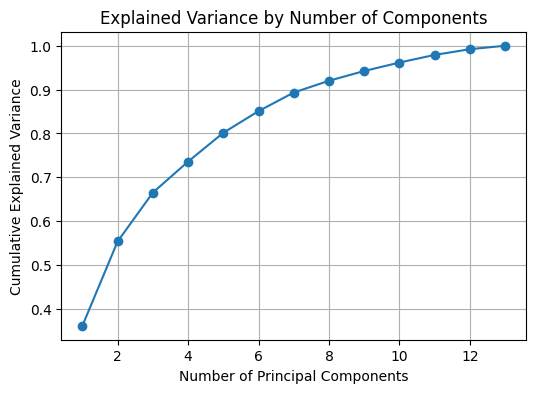

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(x_scaled)

"""
# TODO: DETERMINE NUMBER OF COMPONENTS RETAINING >=90% VARIANCE AND RERUN CLUSTERING
# TODO: Compute and tabulate performance metrics before vs after PCA
a. Use PCA to determine principal components ideal for creating a reduced
dimensionality for the dataset - ANSWER: Even 1 component/dimensionality will suffice
> 90% variance retained between 1-12 principal components onwards
>
b. Compute and tabulate the performance before and after PCA
"""

# COMPUTING EXPLAINED VARIANCE RATIO
# DETERMINE NUMBER OF COMPONENTS RETAINING >= 90% VARIATION, THEN RERUN CLUSTERING
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(6,4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [ ]:
"""
components_df = pd.DataFrame(row, columns)
REMEMBER THAT X.SHAPE[1] CHOOSES COLUMNS. IF YOU WANT X.SHAPE[0] THAT IS ROW.
"""
# CALCULATING PRINCIPAL COMPONENT LOADINGS
components_df = pd.DataFrame(
    pca.components_,
    columns=wine.feature_names,
    index=[f'PC{i + 1}' for i in range(13)] # how much each principle vlaue contributes
    # to creation of new principal component
    # lower is better
)

"""
index changes row lables of df to PC1, PC2, as in Principal Components
"""
components_df.index = [f'PC{i+1}' for i in range(x.shape[1])]
print("\nPrincipal Component Loadings:")
print(components_df.round(3))


Principal Component Loadings:
      alcohol  malic_acid    ash  alcalinity_of_ash  magnesium  total_phenols  \
PC1     0.144      -0.245 -0.002             -0.239      0.142          0.395   
PC2     0.484       0.225  0.316             -0.011      0.300          0.065   
PC3    -0.207       0.089  0.626              0.612      0.131          0.146   
PC4    -0.018       0.537 -0.214              0.061     -0.352          0.198   
PC5    -0.266       0.035 -0.143              0.066      0.727         -0.149   
PC6     0.214       0.537  0.154             -0.101      0.038         -0.084   
PC7    -0.056       0.421 -0.149             -0.287      0.323         -0.028   
PC8     0.396       0.066 -0.170              0.428     -0.156         -0.406   
PC9    -0.509       0.075  0.308             -0.200     -0.271         -0.286   
PC10    0.212      -0.309 -0.027              0.053      0.068         -0.320   
PC11   -0.226       0.076 -0.499              0.479      0.071          0.304 

In [ ]:
# PCA DIMENSIONALITY REDUCTION WITH LOGISTIC REGRESSION
results = []

"""
PCA model keeps only n components.
- PCA object reduces data to n dimensions
- n = n dimensions, if n = 1 then only 1 PC, so on and so forth
"""
for n in range(1, x.shape[1] + 1):
    pca = PCA(n_components=n)
    # REDUCED SCALED DATA TO N DIMENSIONS
    # FITS PCA SCALED DATA, TRANSFORMS
    X_reduced = pca.fit_transform(x_scaled)


    # SPLITTING INTO TRAINING AND TESTING DATASETS
    X_train, X_test, y_train, y_test = train_test_split(
        X_reduced, y, test_size=0.3, random_state=42
    )

    # RUNS MODEL ON UNSEEN DATA 1000 TIMES
    # GENERATES Y_PRED TO COMPARE WITH Y_TEST (ACTUAL LABELS)
    # APPLYING CLASSIFIER, LOGISTIC REGRESSION
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    # PERFORMING PREDICTIONS ON X_TETS WITH CLF
    y_pred = clf.predict(X_test)

    # ACCURACY SCORE BY COMPARING Y_PRED TO Y_TEST
    acc = accuracy_score(y_test, y_pred)
    results.append((n, acc, pca.explained_variance_ratio_.sum()))

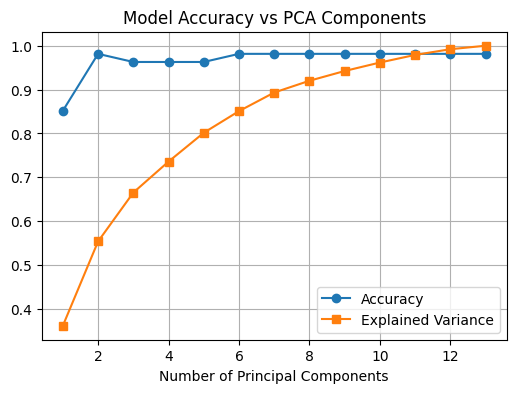


Accuracy and variance by component count:
    n_components  accuracy  explained_var
0              1     0.852          0.362
1              2     0.981          0.554
2              3     0.963          0.665
3              4     0.963          0.736
4              5     0.963          0.802
5              6     0.981          0.851
6              7     0.981          0.893
7              8     0.981          0.920
8              9     0.981          0.942
9             10     0.981          0.962
10            11     0.981          0.979
11            12     0.981          0.992
12            13     0.981          1.000


In [ ]:
# PLOTTING
# Convert to DataFrame
acc_df = pd.DataFrame(results, columns=['n_components', 'accuracy', 'explained_var'])

# Plot accuracy vs n_components
plt.figure(figsize=(6,4))
plt.plot(acc_df['n_components'], acc_df['accuracy'], marker='o', label='Accuracy')
plt.plot(acc_df['n_components'], acc_df['explained_var'], marker='s', label='Explained Variance')
plt.xlabel('Number of Principal Components')
plt.legend()
plt.grid(True)
plt.title('Model Accuracy vs PCA Components')
plt.show()

print("\nAccuracy and variance by component count:")
print(acc_df.round(3))

In [ ]:
pca = PCA(n_components=8)
x_pca = pca.fit_transform(x_scaled)

# KMeans
K = range(2, 11)
pca_silhouettes = []
pca_calinski_harabasz = []

# PERFORMING KMEANS AFTER PCA
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_pca)
    labels = kmeans.fit_predict(x_pca)
    silhouette_avg = silhouette_score(x_pca, labels)
    pca_silhouettes.append(silhouette_avg)
    calinski_h = calinski_harabasz_score(x_pca, labels)
    pca_calinski_harabasz.append(calinski_h)

results_kmeans = pd.DataFrame({
    'K': list(K),
    'Silhouette Score': pca_silhouettes,
    'Calinski-Harabasz Score':pca_calinski_harabasz,
})

print(results_kmeans)

# DBSCAN

print("\nDBSCAN")

epsilon = [0.5, 1.0, 1.5]
min_sample_values = [2, 3, 5]
for eps in epsilon:
    for m in min_sample_values:
        dbscan = DBSCAN(eps=eps, min_samples=m)
        print(F"Epsilon value: {eps}, minimum samples per cluster: {m}")
        # Finding Clusters by Fit and Labeling Points by Cluster by Predict
        dbscan_labels = dbscan.fit_predict(x_pca)

        # Determining Number of Clusters
        n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        print(F"Estimated number of clusters: {n_clusters}")

        # Computing Silhouette Score
        if n_clusters > 1:
            silhouette_avg = silhouette_score(x_pca, dbscan_labels)
            print(F"Silhouette score: {silhouette_avg}")
        else: print("Need more than 1 cluster to define silhouette score.")

    K  Silhouette Score  Calinski-Harabasz Score
0   2          0.293005                78.164895
1   3          0.314970                82.745506
2   4          0.273854                65.076136
3   5          0.226357                53.940474
4   6          0.165864                48.075843
5   7          0.177987                45.567807
6   8          0.144411                38.089850
7   9          0.143792                34.639905
8  10          0.142191                33.230244

DBSCAN
Epsilon value: 0.5, minimum samples per cluster: 2
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.
Epsilon value: 0.5, minimum samples per cluster: 3
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.
Epsilon value: 0.5, minimum samples per cluster: 5
Estimated number of clusters: 0
Need more than 1 cluster to define silhouette score.
Epsilon value: 1.0, minimum samples per cluster: 2
Estimated number of clusters: 12
Silhouette

In [ ]:
p_value = stats.wilcoxon(silhouettes, pca_silhouettes)
print("p-value =", p_value.pvalue)

p-value = 0.30078125


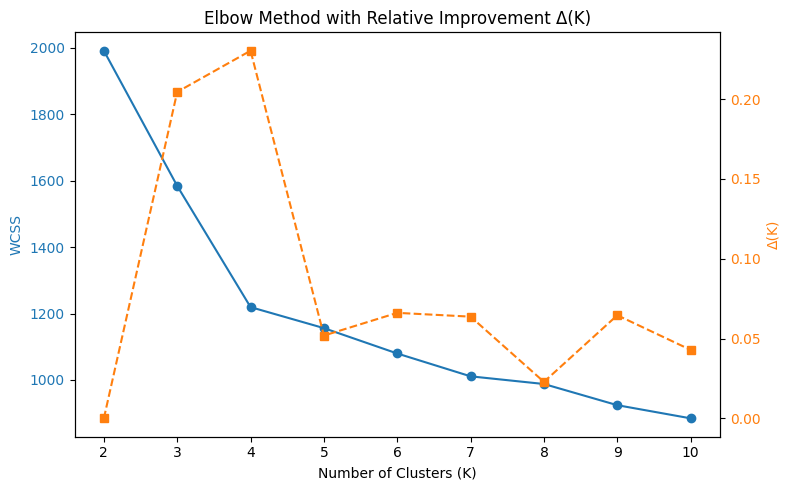

,K,WCSS,Silhouette Score,Calinski-Harabasz Score,Delta(K),Runtime (in ms)
0,2,1991.424713,0.148805,29.325953,0.000000,0.033466
1,3,1584.150427,0.210578,43.136092,0.204514,0.018298
2,4,1219.238774,0.285772,52.545936,0.230352,0.017015
3,5,1156.006500,0.221160,43.420369,0.051862,0.041898
4,6,1079.592362,0.195677,39.547345,0.066102,0.015578
5,7,1010.800768,0.206661,36.865144,0.063720,0.013156
6,8,987.708498,0.131227,33.064633,0.022846,0.008617
7,9,923.915801,0.147705,32.070183,0.064587,0.009434
8,10,884.294807,0.145480,30.408581,0.042884,0.010287


In [ ]:
K = range(2, 11)
wcss_miniBatch = []
silhouette_miniBatch = []
calinski_harabasz_miniBatch = []
runtimeList_miniBatch = []

for k in K:
  miniBatchModel = MiniBatchKMeans(n_clusters=k, random_state=42)

  runtime = 0.0
  start_time = time.perf_counter()
  miniBatchModel.fit(x_scaled)
  end_time = time.perf_counter()
  runtime = end_time - start_time

  labels_miniBatch = miniBatchModel.fit_predict(x_scaled)
  wcss_miniBatch.append(miniBatchModel.inertia_)
  silhouette_avg = silhouette_score(x_scaled, labels_miniBatch)
  silhouette_miniBatch.append(silhouette_avg)
  calinski_h = calinski_harabasz_score(x_scaled, labels_miniBatch)
  calinski_harabasz_miniBatch.append(calinski_h)
  runtimeList_miniBatch.append(runtime)

delta_miniBatch = [0]
for k in range(1, len(wcss_miniBatch)):
    delta_k = (wcss_miniBatch[k-1] - wcss_miniBatch[k]) / wcss_miniBatch[k-1]
    delta_miniBatch.append(delta_k)

fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (K)')
ax1.set_ylabel('WCSS', color=color)
ax1.plot(K, wcss_miniBatch, 'o-', color=color, label='WCSS')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Δ(K)', color=color)
ax2.plot(K, delta_miniBatch, 's--', color=color, label='Δ(K)')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Elbow Method with Relative Improvement Δ(K)')
fig.tight_layout()
plt.show()

results_miniBatch = pd.DataFrame({
    'K': list(K),
    'WCSS': wcss_miniBatch,
    'Silhouette Score': silhouette_miniBatch,
    'Calinski-Harabasz Score':calinski_harabasz_miniBatch,
    'Delta(K)': delta_miniBatch,
    'Runtime (in ms)': runtimeList_miniBatch
})

results_miniBatch

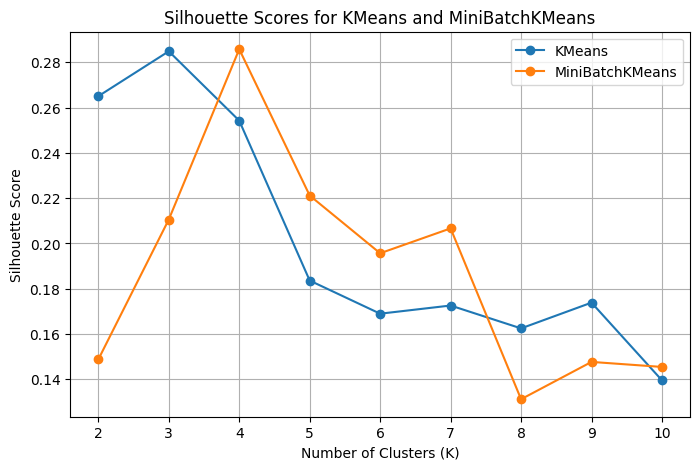

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(results_kmeans_original['K'], results_kmeans_original['Silhouette Score'], marker='o', label='KMeans')
plt.plot(results_miniBatch['K'], results_miniBatch['Silhouette Score'], marker='o', label='MiniBatchKMeans')

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for KMeans and MiniBatchKMeans')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Comparing silhouette score
p_value = stats.wilcoxon(silhouettes, silhouette_miniBatch)
print("p-value =", p_value.pvalue)

p-value = 1.0


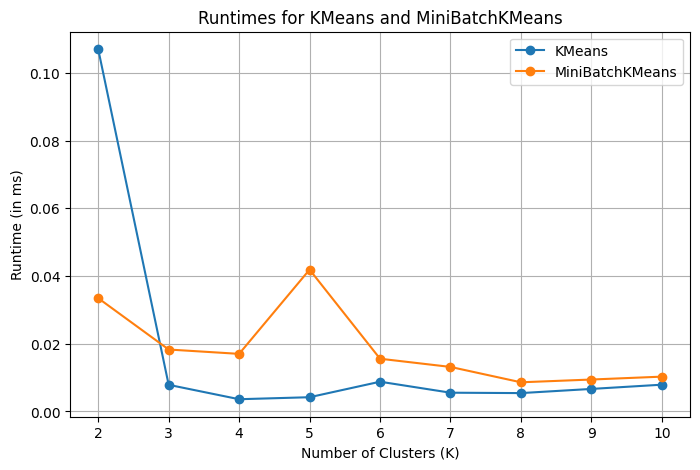

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(results_kmeans_original['K'], results_kmeans_original['Runtime (in ms)'], marker='o', label='KMeans')
plt.plot(results_miniBatch['K'], results_miniBatch['Runtime (in ms)'], marker='o', label='MiniBatchKMeans')

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Runtime (in ms)')
plt.title('Runtimes for KMeans and MiniBatchKMeans')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Comparing runtime
p_value = stats.wilcoxon(runtimeList, runtimeList_miniBatch)
print("p-value =", p_value.pvalue)

p-value = 0.12890625


In [ ]:
# Comparing Calinski-Harabasz score
p_value = stats.wilcoxon(calinski_harabasz, calinski_harabasz_miniBatch)
print("p-value =", p_value.pvalue)

p-value = 0.49609375


In [ ]:
# Comparing Initialization stability

K = 3
random_states = range(0,43)
final_wcss = []

for random_state in random_states:

  kmeans = KMeans(n_clusters=K, random_state=random_state)
  kmeans.fit(x_scaled)
  final_wcss.append(kmeans.inertia_)

results_wcss = pd.DataFrame({
    'Random State': random_states,
    'WCSS': final_wcss,
})
print(results_wcss)

final_wcss.append(results_wcss)

sd_wcss = results_wcss['WCSS'].std()
mean_wcss = results_wcss['WCSS'].mean()
cv = (sd_wcss/mean_wcss)*100
print(f"(KMeans) Coefficient of Variation for WCSS values at K=3: {cv:.2f}%")

    Random State         WCSS
0              0  1277.928489
1              1  1278.760776
2              2  1277.928489
3              3  1277.928489
4              4  1279.966153
5              5  1278.760776
6              6  1282.463518
7              7  1278.760776
8              8  1279.966153
9              9  1277.928489
10            10  1277.928489
11            11  1279.731123
12            12  1277.928489
13            13  1279.731123
14            14  1279.731123
15            15  1282.463518
16            16  1278.760776
17            17  1278.760776
18            18  1279.966153
19            19  1277.928489
20            20  1277.928489
21            21  1277.928489
22            22  1278.760776
23            23  1282.463518
24            24  1279.966153
25            25  1279.731123
26            26  1282.463518
27            27  1277.928489
28            28  1282.463518
29            29  1279.966153
30            30  1279.966153
31            31  1279.966153
32        

In [ ]:
# Comparing Initialization stability

K = 3
random_states = range(0,43)
final_wcss = []

for random_state in random_states:

  kmeans = MiniBatchKMeans(n_clusters=K, random_state=random_state)
  kmeans.fit(x_scaled)
  final_wcss.append(kmeans.inertia_)

results_wcss = pd.DataFrame({
    'Random State': random_states,
    'WCSS': final_wcss,
})
print(results_wcss)

final_wcss.append(results_wcss)

sd_wcss = results_wcss['WCSS'].std()
mean_wcss = results_wcss['WCSS'].mean()
cv = (sd_wcss/mean_wcss)*100
print(f"(MiniBatchKMeans) Coefficient of Variation for WCSS values at K=3: {cv:.2f}%")

    Random State         WCSS
0              0  1280.950114
1              1  1278.588039
2              2  1295.461713
3              3  1286.442932
4              4  1279.889402
5              5  1279.294031
6              6  1279.250203
7              7  1279.837424
8              8  1293.141670
9              9  1279.643993
10            10  1495.570925
11            11  1284.941226
12            12  1299.950856
13            13  1296.553619
14            14  1284.976573
15            15  1279.274537
16            16  1286.146513
17            17  1282.082237
18            18  1294.968933
19            19  1319.498612
20            20  1282.985081
21            21  1280.176079
22            22  1281.237985
23            23  1280.015938
24            24  1280.528818
25            25  1283.278452
26            26  1487.108943
27            27  1282.659088
28            28  1279.187904
29            29  1284.070037
30            30  1281.090919
31            31  1282.787482
32        